

# Investigate a Dataset: [no_show_appointments-kagglev2-may-2016]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

>● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

>● ‘Neighborhood’ indicates the
location of the hospital.

>● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

>● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.



### Question(s) for Analysis
> Which questions need to be asked that could lead to a prediction of the patient showing up or not?

> Are there any correlations between independent variables and the showing up of patients?

> Is there a certain group of patients with similar properties that share the same conclusion or outcome?

> Is my data fair and unbiased? and if not, can i clean it and generate a fair analysis?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report i will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 


### General Properties
> In the following cells i will be exploring my data and checking if there's any missing data or wrong entries and typos. This will help make my analysis easier.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#check for data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#Explore the shape of the dataset 

shape  = df.shape
print(shape) 

(110527, 14)


output means dataset contains 110527 samples (rows) and 14 coloumns

In [5]:
#checks for null values
df.isna().sum().sum()

0

ZERO null values found

In [6]:
#find the number of unique patients 

unique =  df['PatientId'].nunique()
duplicated = df['PatientId'].duplicated().sum()

print('the number of unique patients is :', unique ,'\n the number of duplicated patients is :' , duplicated)

the number of unique patients is : 62299 
 the number of duplicated patients is : 48228


The dataset has 62299 unique patient entries and 48228 duplicated entries.

In [7]:
#summarized stats about the dataset 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
#the describtion of the dataset showed that there is an age of (-1) which does not make any sense so it must be dealt with. 
#first determine the index of the row then delete it in the cleaning data phase 

invalid_index = df[df['Age']< 0].index





### Data Cleaning
> In this part of the report each step in the cleaning data process is explained in comments in the code cells.
 

In [9]:
#remove the row with the invalid 'Age' entry 
df.drop(index = invalid_index , inplace = True)
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
#remove entries of duplicated IDs and showing status

df.drop_duplicates(['PatientId' , 'No-show'] , inplace = True)
df.shape

(71816, 14)

In [11]:
#some of the column names have typos and some need renaming to make the analysis process easier 
rename = {'Hipertension' : 'Hypertension' , 'No-show' : 'No_show' , 'Handcap' : 'Handicap','PatientId' : 'Patient_Id', 'AppointmentID' : 'Appointment_ID' , 'ScheduledDay' : 'Scheduled_Day' , 'AppointmentDay' : 'Appointment_Day' }
df.rename(columns=rename , inplace = True)
df.head(1)

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [12]:
#dispose of unnecessary data that is irrelevant to the analysis 

df.drop(['Patient_Id' , 'Appointment_ID' , 'Scheduled_Day' , 'Appointment_Day'] , axis = 1 , inplace = True )

df.head(1)


,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


# Data wrangling summary 

>The data is now clean and clear of any unnecessary or invalid data and is ready to perform some analysis on it.

<a id='eda'></a>
## Exploratory Data Analysis

> The dataset is now cleaned and trimmed and is ready for visual exploration. The purpose of  this part of the report is to apply and compute mathematical operations to yield the necessary statistics that will help create visualizations that address and answer the questions we have for this dataset.





### Brief overview and visualization of general data 

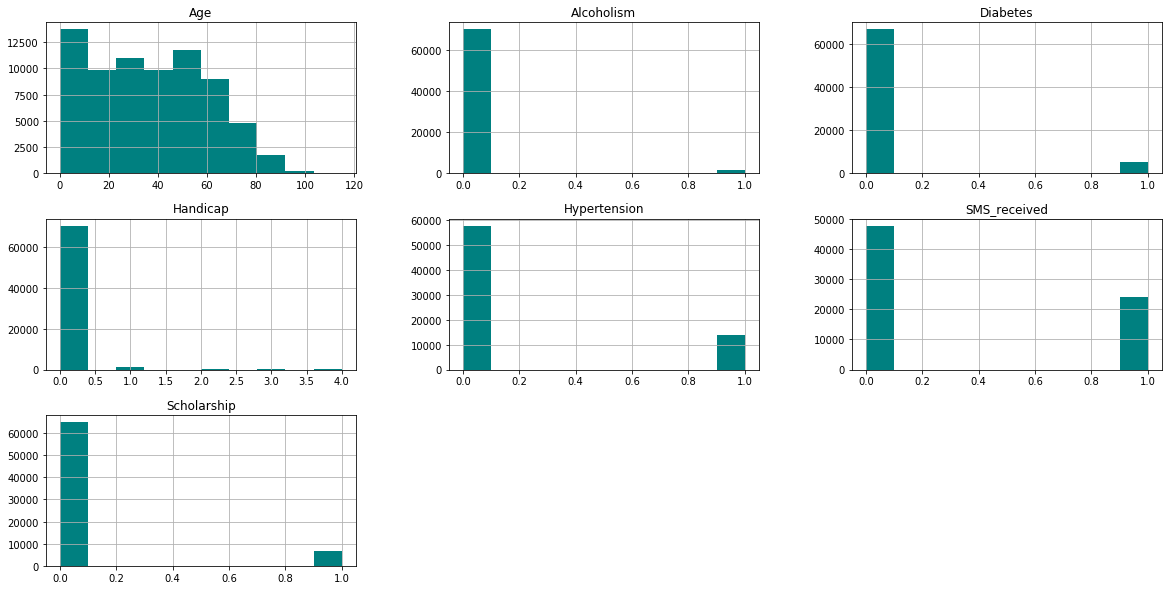

In [16]:
# in this cell, the code generates a histogram for all the values in the dataset.
df.hist(figsize=(20,10) , color = 'teal');

### In the next code cells i will devide the patients into two groups one for each status of showing up to the appointment named 'showed' and 'didnt_show'. 

In [24]:
#divide patients into two groups 

showed = df['No_show'] == 'No'

didnt_show = df['No_show'] == 'Yes'

#the next code line will generate a quick visualization of the counts of who showed and who didnt

df[showed].shape




(54153, 10)

In [23]:
 df[didnt_show].shape

(17663, 10)

The above data states that the number of patients who showed up to their appointments is 54153 which is almost three times the number of patients who did NOT show up to their appointments.

### In the next code cells we'll dive a bit deeper into the properties of the data of the patients who showed up and who did not. 

In [28]:
#the next line of code generates the average values of the entries of patients of the two groups. 

df[showed].mean() 


Age             37.229166
Scholarship      0.091334
Hypertension     0.202944
Diabetes         0.072868
Alcoholism       0.023600
Handicap         0.020904
SMS_received     0.297232
dtype: float64

In [29]:
df[didnt_show].mean()

Age             34.376267
Scholarship      0.108419
Hypertension     0.170922
Diabetes         0.065108
Alcoholism       0.029440
Handicap         0.017777
SMS_received     0.453094
dtype: float64

### More detailed visual investigation 


#### Is there a relation between age and showing up?

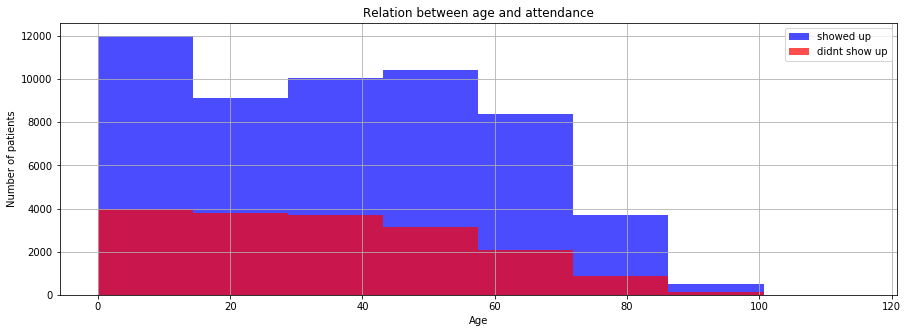

In [30]:
# to plot a graph between age and showing up and figure out if age affects attendance rates 
#a 'function' is used to make this easier

def showing (df,col_name,showed_up,absent):
    
    plt.figure(figsize=[15,5])
    df[col_name][showed].hist(alpha = 0.7 , bins = 8 , color = 'blue' , label = 'showed up')
    df[col_name][didnt_show].hist(alpha = 0.7 , bins = 8 , color = 'red' , label = 'didnt show up')
    plt.legend();
    plt.title('Relation between age and attendance')
    plt.xlabel('Age')
    plt.ylabel('Number of patients')  
    
showing(df,'Age',showed,didnt_show)
    
    
    
    
    


The graph showes that the younger patients tend to show up more than older patients especially the newborns.

### Is there a relation between the age of the patient plus the illness and showing up?

Text(0,0.5,'Average age')

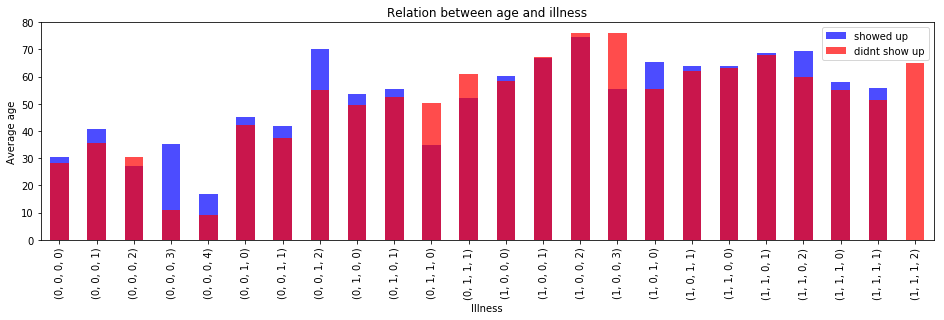

In [32]:
#the next lines of code generate a graph that can answer this question.
    
plt.figure(figsize=[16,4])
df[showed].groupby(['Hypertension' , 'Diabetes' , 'Alcoholism' , 'Handicap']).mean()['Age'].plot(kind = 'bar' ,alpha = 0.7 , color = 'blue' , label = 'showed up')
df[didnt_show].groupby(['Hypertension' , 'Diabetes' , 'Alcoholism' , 'Handicap']).mean()['Age'].plot(kind = 'bar' ,alpha = 0.7 ,  color = 'red' , label = 'didnt show up')
plt.legend();
plt.title('Relation between age and illness')
plt.xlabel('Illness')
plt.ylabel('Average age')  
    

1 and 0 stand for whether the illness is found or not. 1 means the illness is found and 0 means the illness is not found in this segement of patients. 
The illnesses are Hypertension , Diabetes, Alcoholism and Handicap respectively. 

In [33]:
df[showed].groupby(['Hypertension' , 'Diabetes' , 'Alcoholism' , 'Handicap']).mean()['Age'] , df[didnt_show].groupby(['Hypertension' , 'Diabetes' , 'Alcoholism' , 'Handicap']).mean()['Age']

(Hypertension  Diabetes  Alcoholism  Handicap
 0             0         0           0           30.358334
                                     1           40.781532
                                     2           27.178571
                                     3           35.250000
                                     4           17.000000
                         1           0           44.988717
                                     1           42.000000
                                     3           70.000000
               1         0           0           53.752976
                                     1           55.478261
                                     2           35.000000
                         1           0           52.029412
 1             0         0           0           60.234788
                                     1           66.897436
                                     2           74.352941
                         1           0           55.397403
          

### which gender is more likely to show up?

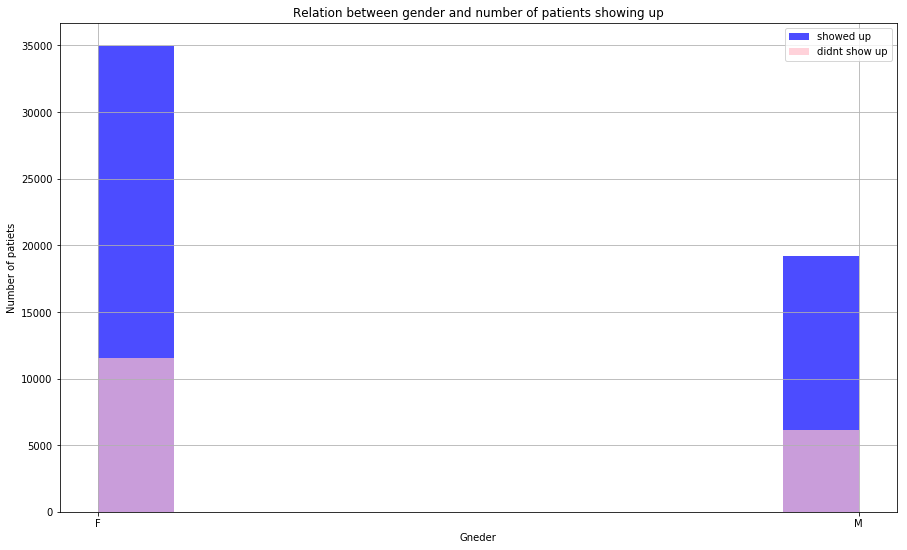

In [36]:
plt.figure(figsize = [15,9])
df.Gender[showed].hist(alpha = 0.7 , label = 'showed up' , color = 'blue')
df.Gender[didnt_show].hist(alpha = 0.7 , label = 'didnt show up' , color = 'pink')
plt.legend()
plt.title('Relation between gender and number of patients showing up')
plt.xlabel('Gneder')
plt.ylabel('Number of patiets');


The graph shows that as the number of female patients might be greater but the gender does NOT significantly affect the rate of showing up

### Is there a relation between the neighbourhoods of patients and the rates of attendance?

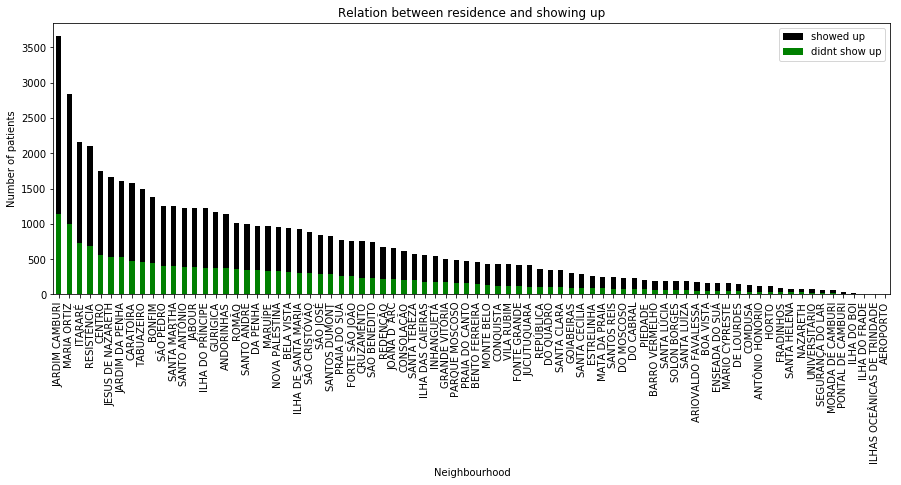

In [37]:
plt.figure(figsize = [15,5])
df.Neighbourhood[showed].value_counts().plot(kind = 'bar' , color = 'black' , label = 'showed up')
df.Neighbourhood[didnt_show].value_counts().plot(kind = 'bar' , color = 'green' , label = 'didnt show up')
plt.legend();
plt.title('Relation between residence and showing up')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of patients');

### Is there a relation between sending an SMS to patients and their showing up?

Text(0,0.5,'Number of patients')

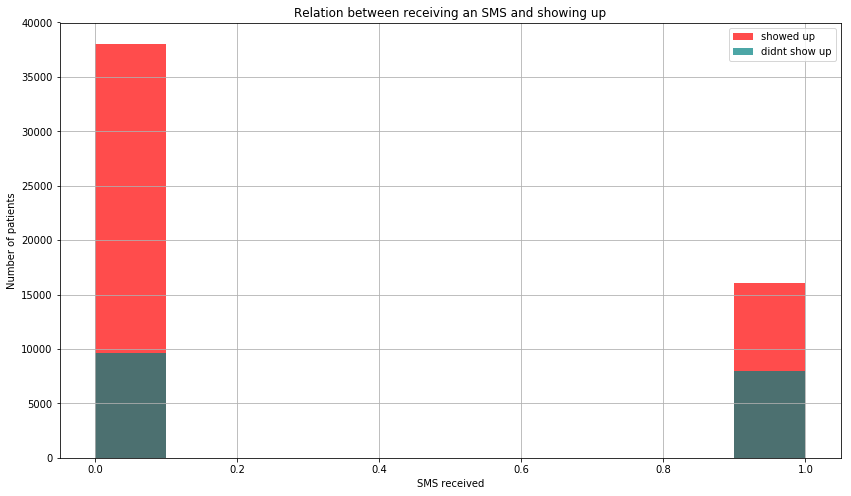

In [52]:
plt.figure(figsize = [14,8])
df.SMS_received[showed].hist(alpha = 0.7 , label = 'showed up' , color = 'red')
df.SMS_received[didnt_show].hist(alpha = 0.7 , label = 'didnt show up' , color = 'teal')
plt.legend();
plt.title('Relation between receiving an SMS and showing up')
plt.xlabel('SMS received')
plt.ylabel('Number of patients')

0 means no SMS has been received and 1 means an SMS has been received.

### Is there a relation between being handicapped and showing up?

Text(0,0.5,'Number of patients')

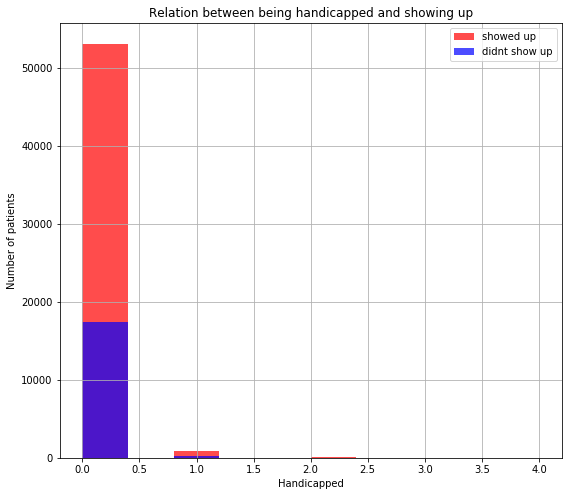

In [54]:
plt.figure(figsize = [9,8])
df.Handicap[showed].hist(alpha = 0.7 , label = 'showed up' , color = 'red')
df.Handicap[didnt_show].hist(alpha = 0.7 , label = 'didnt show up' , color = 'blue')
plt.legend();
plt.title('Relation between being handicapped and showing up')
plt.xlabel('Handicapped')
plt.ylabel('Number of patients')

shows a relation between being handicapped and showing up.

<a id='conclusions'></a>
## Conclusions

> In this report i have gone through some questions that can be answered with the help of the data given.

> Each stat generated is explained and shows how effective taking it into consideration might be.

> It was apparent that patients of young age noticably tend to show up more than older patients and that gender has no effect whatsoever in the rates of attendence. 

> The graphs showed that rates of showing up are strongly related to the Neighbourhoods of the patients.


> The analysis also showed that sending an SMS  was only effective in five neighbourhoods.

> Some of the limitations of the work on this project was the absence of some reliable data that could have helped add more insight like a brief status of the weather on the dates of the appointments because maybe the state of the weather affects the rates of showing up and to overcome this it is advised to register a brief weather state corresponding to each date.

> Another limitation to the analysis insights and conclusions is the lack of relatives data to the patients. Maybe many of the patients who do not have relatives registered or an emergency contact saved in the database tend to not show up to their appointments.



In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0